In [1]:
import matplotlib.pyplot as plt
import cv2

In [6]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255, # масштабирование значений пикселей в диапазон от 0 до 1
    rotation_range=20, # угол поворота изображения
    width_shift_range=0.2, # смещение изображения по горизонтали
    height_shift_range=0.2, # смещение изображения по вертикали
    shear_range=0.2, # сдвиг изображения
    zoom_range=0.2, # масштабирование изображения
    vertical_flip=True,
    horizontal_flip=True, # отражение изображения по горизонтали
    brightness_range= (0.5,2.5),
    fill_mode='nearest', # заполнение пикселей после преобразований
    preprocessing_function=preprocess_input # препроцессинг изображений для распознавания лиц

)

In [ ]:
import os
from keras.preprocessing import image
import keras.utils as image


original_dir = 'фото/cuted_test/'

augmented_dir = 'фото/aug_cuted_test'

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

for root, dirs, files in os.walk(original_dir):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = image.load_img(img_path)
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = preprocess_input(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=augmented_dir,
                                  save_prefix=filename.split('.')[0],
                                  save_format='jpg'):
            i += 1
            if i >= 5: # random 5 images
                break


In [7]:
datagen.flow_from_directory('../фото/aug_tt/aug_train/')

Found 2818 images belonging to 15 classes.


In [8]:
datagen.flow_from_directory('../фото/aug_tt/aug_test/')

Found 333 images belonging to 15 classes.


In [9]:
image_shape = (150,150,3)
# image_shape = (224,224,3)

In [12]:
from keras import Sequential
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image



import tensorflow as tf
from tensorflow.keras import layers
classifier = tf.keras.Sequential([
    Conv2D(32, (4,4), activation='relu', padding='same', input_shape=image_shape),
    BatchNormalization(),
    Conv2D(32, (4,4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(64, (4,4), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (4,4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(128, (4,4), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (4,4), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

classifier.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# cnn_classifier= Sequential([
#     Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= image_shape),
#     MaxPooling2D(pool_size=2),
#     Flatten(),
#     Dense(1024, activation='relu'),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     #20 is the number of outputs
#     Dense(20, activation='softmax')  
# ])



In [10]:
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPool2D
# from keras.layers import Flatten
# from keras.layers import Dense

# classifier= Sequential()


# classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(150,150,3), activation='relu'))

# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# classifier.add(MaxPool2D(pool_size=(2,2)))

# classifier.add(Flatten())

# classifier.add(Dense(64, activation='relu'))

# classifier.add(Dense(15, activation='softmax'))

# #classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])




In [13]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      1568      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      16416     
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

In [168]:
# # compile
# from keras.optimizers import SGD
# from keras.optimizers import rmsprop
# from keras.optimizers import Adam

# optimizer = Adam(lr=0.0001)

# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
batch_size = 32

train_image_gen = datagen.flow_from_directory('../фото/aug_tt/aug_train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') 
                                               # shuffle = True) #binary, sparse, categorical

Found 2818 images belonging to 15 classes.


In [15]:
test_image_gen = datagen.flow_from_directory('../фото/aug_tt/aug_test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
                                               # shuffle=True)

Found 333 images belonging to 15 classes.


In [16]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
print(train_image_gen.n)
print(train_image_gen.batch_size)

2818
32


In [ ]:
hehe = classifier.fit_generator(
                    train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=100,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/100
88/88 [==============================] - 465s 5s/step - loss: 4.9197 - accuracy: 0.1522 - val_loss: 7.0355 - val_accuracy: 0.0562
Epoch 2/100
88/88 [==============================] - 563s 6s/step - loss: 4.5817 - accuracy: 0.2297 - val_loss: 6.9767 - val_accuracy: 0.0594
Epoch 3/100
88/88 [==============================] - 524s 6s/step - loss: 4.3091 - accuracy: 0.2649 - val_loss: 6.4400 - val_accuracy: 0.0906
Epoch 4/100
88/88 [==============================] - 516s 6s/step - loss: 4.0717 - accuracy: 0.2782 - val_loss: 4.4942 - val_accuracy: 0.0906
Epoch 5/100
88/88 [==============================] - 564s 6s/step - loss: 4.4870 - accuracy: 0.1910 - val_loss: 8.0106 - val_accuracy: 0.1187
Epoch 6/100
88/88 [==============================] - 587s 7s/step - loss: 4.0770 - accuracy: 0.2200 - val_loss: 3.7510 - val_accuracy: 0.2438
Epoch 7/100
88/88 [==============================] - 620s 7s/step - loss: 3.6111 - accuracy: 0.2760 - val_loss: 3.6585 - val_accuracy: 0.2562
Epoch 

In [57]:
# import numpy as np
# history=cnn_model.fit(
#     np.array(train_image_gen), batch_size=512,
#     epochs=250, verbose=2,
#     validation_data=(np.array(test_image_gen)),
# )

In [1]:
# # history = cnn_model.fit(train_image_gen,epochs=150,validation_data=test_image_gen)
# story=cnnModel.fit(
#     train_image_gen,
#     steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
#     epochs=20,
#     validation_data=test_image_gen,
#     validation_steps=test_image_gen.n // test_image_gen.batch_size,
#     verbose=1)

In [3]:
hehe.history['accuracy']

NameError: name 'history' is not defined

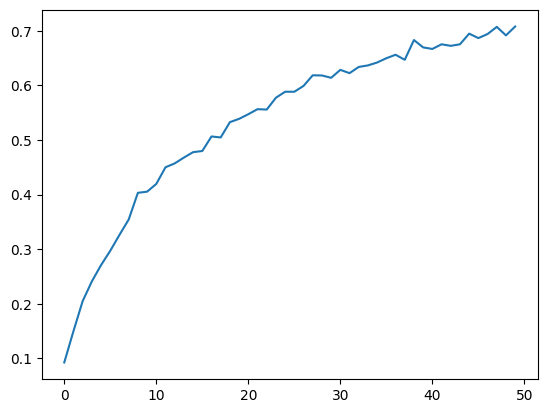

In [18]:
plt.plot(hehe.history['accuracy'])

In [19]:
classifier.save('18e.h5')

In [1]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('qwerasd.h5')

class_dict = {
    # 4: 'Akhmedov Sanzhar',
    # 1: 'Alikhan Zhamankhan',
    # 2: 'Baibatchayeva Anar',
    # 3: 'Dalabay Abylay',
    # 0: 'Ernar'
    0: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Dalabay Abylay',
    4: 'Daniyar Raiymbekov',
    5: 'Duisenov Alikhan',
    11: 'Ernar',
    7: 'Kenzhebay Askar',
    8: 'Kyran Yerkin',
    9: 'Maxat Ualikhan',
    10: 'Rysmambetov Nurtugan',
    6: 'Sagynbek Nurbolat',
    12: 'Yerkin Yernar',
    13: 'Zhetessov Nur',
    14: 'Zhumabekov Magjan'
}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    # print(ret, frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 129ms/step


In [2]:
model.history['accuracy']

TypeError: 'History' object is not subscriptable